In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Final Data\ChickPea\KR_MH_ChickPea_dataset.csv")
df = df.drop(columns=['latitude','longitude','DistrictName', 'year','index'])
df = df.sample(frac=1).reset_index(drop=True)
#df = df.drop(columns=['DistrictName','latitude','longitude','year','year_mask'])

In [3]:
df = df.rename(columns={'Yield(tonnes/hectare)':'Yield(Tonnes/Hectare)'},inplace=False)

In [4]:
df.columns

Index(['stl1_11', 'stl1_12', 'stl1_1', 'stl1_2', 'stl1_3', 'stl1_4', 'stl2_11',
       'stl2_12', 'stl2_1', 'stl2_2', 'stl2_3', 'stl2_4', 'stl3_11', 'stl3_12',
       'stl3_1', 'stl3_2', 'stl3_3', 'stl3_4', 'stl4_11', 'stl4_12', 'stl4_1',
       'stl4_2', 'stl4_3', 'stl4_4', 'swvl1_11', 'swvl1_12', 'swvl1_1',
       'swvl1_2', 'swvl1_3', 'swvl1_4', 'swvl2_11', 'swvl2_12', 'swvl2_1',
       'swvl2_2', 'swvl2_3', 'swvl2_4', 'swvl3_11', 'swvl3_12', 'swvl3_1',
       'swvl3_2', 'swvl3_3', 'swvl3_4', 'swvl4_11', 'swvl4_12', 'swvl4_1',
       'swvl4_2', 'swvl4_3', 'swvl4_4', 'ssr_12', 'ssr_11', 'ssr_1', 'ssr_2',
       'ssr_3', 'ssr_4', 'u10_11', 'u10_12', 'u10_1', 'u10_2', 'u10_3',
       'u10_4', 'v10_11', 'v10_12', 'v10_1', 'v10_2', 'v10_3', 'v10_4',
       'tmax_11', 'tmax_12', 'tmax_1', 'tmax_2', 'tmax_3', 'tmax_4', 'tmin_11',
       'tmin_12', 'tmin_1', 'tmin_2', 'tmin_3', 'tmin_4', 'rain_11', 'rain_12',
       'rain_1', 'rain_2', 'rain_3', 'rain_4', 'countrain_11', 'countrain_12',
   

In [5]:
# df['stl1'] = (df['stl1_1'] + df['stl1_2'])/2
# df['stl2'] = (df['stl2_1'] + df['stl2_2'])/2
# df['stl3'] = (df['stl3_1'] + df['stl3_2'])/2
# df['stl4'] = (df['stl4_1'] + df['stl4_2'])/2
# df['swvl1'] = (df['swvl1_1'] + df['swvl1_2'])/2
# df['swvl2'] = (df['swvl2_1'] + df['swvl2_2'])/2
# df['swvl3'] = (df['swvl3_1'] + df['swvl3_2'])/2
# df['swvl4'] = (df['swvl4_1'] + df['swvl4_2'])/2
# df['ssr'] = (df['ssr_1'] + df['ssr_2'])/2
# df['rain'] = (df['rain_1'] + df['rain_2'])/2
# df['tmax'] = (df['tmax_1'] + df['tmax_2'])/2
# df['tmin'] = (df['tmin_1'] + df['tmin_2'])/2
# df['countrain'] = df['countrain_1'] + df['countrain_2']
# df['u10'] = (df['u10_3']+df['u10_4'])/2
# df['v10'] = (df['v10_3']+df['v10_4'])/2
# df['rh'] = (df['rh_3']+df['rh_4'])/2

In [6]:
# df = df.drop(columns=['stl1_1','stl1_2','stl2_1','stl2_2','stl3_1','stl3_2','stl4_1','stl4_2','swvl1_1','swvl1_2','swvl2_1','swvl2_2','swvl3_1','swvl3_2','swvl4_1','swvl4_2','ssr_1','ssr_2','rain_1','rain_2','tmax_1','tmax_2','tmin_1','tmin_2','countrain_1','countrain_2','u10_3','u10_4','v10_3','v10_4','rh_3','rh_4'],axis=1)

In [7]:
df.shape

(1600, 97)

In [8]:
df.columns

Index(['stl1_11', 'stl1_12', 'stl1_1', 'stl1_2', 'stl1_3', 'stl1_4', 'stl2_11',
       'stl2_12', 'stl2_1', 'stl2_2', 'stl2_3', 'stl2_4', 'stl3_11', 'stl3_12',
       'stl3_1', 'stl3_2', 'stl3_3', 'stl3_4', 'stl4_11', 'stl4_12', 'stl4_1',
       'stl4_2', 'stl4_3', 'stl4_4', 'swvl1_11', 'swvl1_12', 'swvl1_1',
       'swvl1_2', 'swvl1_3', 'swvl1_4', 'swvl2_11', 'swvl2_12', 'swvl2_1',
       'swvl2_2', 'swvl2_3', 'swvl2_4', 'swvl3_11', 'swvl3_12', 'swvl3_1',
       'swvl3_2', 'swvl3_3', 'swvl3_4', 'swvl4_11', 'swvl4_12', 'swvl4_1',
       'swvl4_2', 'swvl4_3', 'swvl4_4', 'ssr_12', 'ssr_11', 'ssr_1', 'ssr_2',
       'ssr_3', 'ssr_4', 'u10_11', 'u10_12', 'u10_1', 'u10_2', 'u10_3',
       'u10_4', 'v10_11', 'v10_12', 'v10_1', 'v10_2', 'v10_3', 'v10_4',
       'tmax_11', 'tmax_12', 'tmax_1', 'tmax_2', 'tmax_3', 'tmax_4', 'tmin_11',
       'tmin_12', 'tmin_1', 'tmin_2', 'tmin_3', 'tmin_4', 'rain_11', 'rain_12',
       'rain_1', 'rain_2', 'rain_3', 'rain_4', 'countrain_11', 'countrain_12',
   

In [9]:
df = df.dropna(subset=['Yield(Tonnes/Hectare)'])

In [10]:
df.shape

(1202, 97)

In [11]:
df['Yield(Tonnes/Hectare)'].skew()

1.6680642138243265

C:\Users\Kanishk Goyal\AppData\Local\Temp\ipykernel_37352\994257175.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Yield(Tonnes/Hectare)'],color='green')


<Axes: xlabel='Yield(Tonnes/Hectare)', ylabel='Density'>

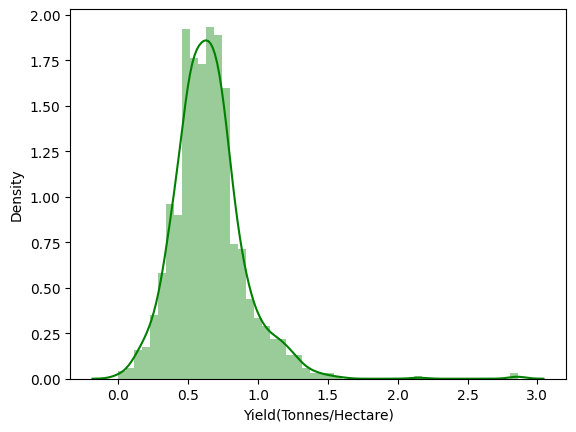

In [12]:
sns.distplot(df['Yield(Tonnes/Hectare)'],color='green')

In [13]:
df['Yield(Tonnes/Hectare)']

0       0.23
1       0.58
3       0.64
4       0.57
6       0.90
        ... 
1592    0.52
1594    1.15
1595    0.51
1596    0.48
1597    1.02
Name: Yield(Tonnes/Hectare), Length: 1202, dtype: float64

In [14]:
Q1 = df['Yield(Tonnes/Hectare)'].quantile(0.25)
Q3 = df['Yield(Tonnes/Hectare)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Yield_no_outliers'] = np.where((df['Yield(Tonnes/Hectare)'] < lower_bound) | (df['Yield(Tonnes/Hectare)'] > upper_bound), np.nan, df['Yield(Tonnes/Hectare)'])

num_points_after_handling_outliers = df['Yield_no_outliers'].count()
print("Number of points in the final DataFrame after handling outliers:", num_points_after_handling_outliers)

Number of points in the final DataFrame after handling outliers: 1158


In [15]:
df = df.dropna(subset=['Yield_no_outliers'])
df = df.drop(columns=['Yield(Tonnes/Hectare)'])

In [16]:
df.rename(columns={'Yield_no_outliers': 'Yield(Tonnes/Hectare)'}, inplace=True)

In [17]:
df['Yield(Tonnes/Hectare)'].skew()

0.15173848814700808

C:\Users\Kanishk Goyal\AppData\Local\Temp\ipykernel_37352\1820324139.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Yield(Tonnes/Hectare)'])


<Axes: xlabel='Yield(Tonnes/Hectare)', ylabel='Density'>

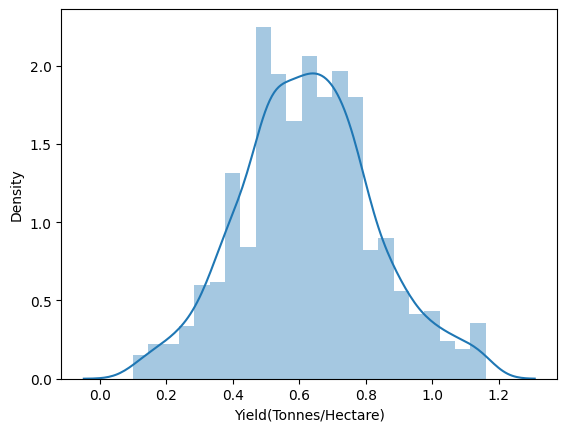

In [18]:
sns.distplot(df['Yield(Tonnes/Hectare)'])

In [19]:
df.head(10)

,stl1_11,stl1_12,stl1_1,stl1_2,stl1_3,stl1_4,stl2_11,stl2_12,stl2_1,stl2_2,...,countrain_2,countrain_3,countrain_4,rh_11,rh_12,rh_1,rh_2,rh_3,rh_4,Yield(Tonnes/Hectare)
0,25.974273,24.381843,25.599655,28.663775,32.096554,36.003179,26.280385,24.784700,25.450361,28.256473,...,0,1,0,51.632696,44.671626,43.947648,31.604435,23.084419,16.992407,0.23
1,26.751969,22.587575,21.723626,25.341858,30.388277,33.912103,26.890797,23.230922,21.987696,24.901901,...,0,0,0,45.016424,60.152452,52.716848,46.152277,34.754508,31.730145,0.58
3,24.992379,24.351245,23.915392,28.852154,34.015409,38.224122,25.474891,24.600925,24.108250,28.271924,...,3,1,0,58.449419,49.470111,38.573611,39.396202,25.522722,18.211637,0.64
4,25.829532,25.172885,24.466076,26.439405,27.694115,28.069767,25.689002,25.152110,24.601630,26.147021,...,0,0,4,65.849136,47.522200,52.871390,50.715869,60.468702,74.191692,0.57
6,23.731168,22.794091,23.875338,27.565174,30.811638,35.396396,24.103026,23.164983,23.854722,27.127745,...,0,1,0,46.368746,44.712006,42.285009,32.657187,23.824269,16.048068,0.90
7,23.160866,21.804547,22.794879,25.007367,28.727020,29.583313,23.380142,22.037117,22.747961,24.653434,...,0,1,8,83.130219,71.932223,52.857068,44.478105,38.495691,57.934113,0.75
10,25.521795,22.844697,22.372738,25.703093,30.007540,34.338946,25.735925,23.424316,22.628454,25.277930,...,0,0,0,48.386093,46.989968,41.968562,36.734644,25.611574,21.501043,0.60
11,23.917268,23.884608,24.001671,26.227348,27.990070,28.703546,23.961648,23.898256,23.949345,25.923322,...,0,4,6,65.015770,61.931546,53.279526,41.631693,62.072651,65.064811,0.69
14,21.966641,21.127905,21.501884,25.267210,28.501751,28.742141,22.111016,21.243955,21.532513,24.673864,...,1,0,11,82.849276,77.216584,64.181906,52.340884,46.057062,65.855362,0.48
15,25.391314,23.897636,24.938866,25.746941,29.202342,35.038669,25.652328,24.166716,25.085103,25.399280,...,1,3,1,49.960884,41.867559,48.398759,45.483690,36.084103,28.064851,0.50


In [20]:
df.shape

(1158, 97)

In [21]:
# cat_cols = ['DistrictName', 'year']
# # Label encode categorical columns
# encoder = LabelEncoder()
# df[cat_cols] = df[cat_cols].apply(encoder.fit_transform)

In [22]:
df.head()

,stl1_11,stl1_12,stl1_1,stl1_2,stl1_3,stl1_4,stl2_11,stl2_12,stl2_1,stl2_2,...,countrain_2,countrain_3,countrain_4,rh_11,rh_12,rh_1,rh_2,rh_3,rh_4,Yield(Tonnes/Hectare)
0,25.974273,24.381843,25.599655,28.663775,32.096554,36.003179,26.280385,24.784700,25.450361,28.256473,...,0,1,0,51.632696,44.671626,43.947648,31.604435,23.084419,16.992407,0.23
1,26.751969,22.587575,21.723626,25.341858,30.388277,33.912103,26.890797,23.230922,21.987696,24.901901,...,0,0,0,45.016424,60.152452,52.716848,46.152277,34.754508,31.730145,0.58
3,24.992379,24.351245,23.915392,28.852154,34.015409,38.224122,25.474891,24.600925,24.108250,28.271924,...,3,1,0,58.449419,49.470111,38.573611,39.396202,25.522722,18.211637,0.64
4,25.829532,25.172885,24.466076,26.439405,27.694115,28.069767,25.689002,25.152110,24.601630,26.147021,...,0,0,4,65.849136,47.522200,52.871390,50.715869,60.468702,74.191692,0.57
6,23.731168,22.794091,23.875338,27.565174,30.811638,35.396396,24.103026,23.164983,23.854722,27.127745,...,0,1,0,46.368746,44.712006,42.285009,32.657187,23.824269,16.048068,0.90


In [23]:
df.shape

(1158, 97)

In [24]:
df.columns

Index(['stl1_11', 'stl1_12', 'stl1_1', 'stl1_2', 'stl1_3', 'stl1_4', 'stl2_11',
       'stl2_12', 'stl2_1', 'stl2_2', 'stl2_3', 'stl2_4', 'stl3_11', 'stl3_12',
       'stl3_1', 'stl3_2', 'stl3_3', 'stl3_4', 'stl4_11', 'stl4_12', 'stl4_1',
       'stl4_2', 'stl4_3', 'stl4_4', 'swvl1_11', 'swvl1_12', 'swvl1_1',
       'swvl1_2', 'swvl1_3', 'swvl1_4', 'swvl2_11', 'swvl2_12', 'swvl2_1',
       'swvl2_2', 'swvl2_3', 'swvl2_4', 'swvl3_11', 'swvl3_12', 'swvl3_1',
       'swvl3_2', 'swvl3_3', 'swvl3_4', 'swvl4_11', 'swvl4_12', 'swvl4_1',
       'swvl4_2', 'swvl4_3', 'swvl4_4', 'ssr_12', 'ssr_11', 'ssr_1', 'ssr_2',
       'ssr_3', 'ssr_4', 'u10_11', 'u10_12', 'u10_1', 'u10_2', 'u10_3',
       'u10_4', 'v10_11', 'v10_12', 'v10_1', 'v10_2', 'v10_3', 'v10_4',
       'tmax_11', 'tmax_12', 'tmax_1', 'tmax_2', 'tmax_3', 'tmax_4', 'tmin_11',
       'tmin_12', 'tmin_1', 'tmin_2', 'tmin_3', 'tmin_4', 'rain_11', 'rain_12',
       'rain_1', 'rain_2', 'rain_3', 'rain_4', 'countrain_11', 'countrain_12',
   

In [25]:
#df = df[['countrain_11', 'countrain_12', 'countrain_1','countrain_2', 'countrain_3', 'countrain_4', 'rain_11', 'rain_12','rain_1', 'rain_2', 'rain_3', 'rain_4','tmax_11', 'tmax_12', 'tmax_1','tmax_2', 'tmax_3', 'tmax_4', 'tmin_11', 'tmin_12', 'tmin_1', 'tmin_2','tmin_3', 'tmin_4','Yield(Tonnes/Hectare)']]

In [26]:
#df = df.drop(columns=['countrain_11', 'countrain_12', 'countrain_1','countrain_2', 'countrain_3', 'countrain_4', 'rain_11', 'rain_12','rain_1', 'rain_2', 'rain_3', 'rain_4','tmax_11', 'tmax_12', 'tmax_1','tmax_2', 'tmax_3', 'tmax_4', 'tmin_11', 'tmin_12', 'tmin_1', 'tmin_2','tmin_3', 'tmin_4'])

In [27]:
df.shape

(1158, 97)

In [28]:
X = df.drop('Yield(Tonnes/Hectare)', axis=1)  # Features
y = df['Yield(Tonnes/Hectare)']  # Target variable

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# X = X.drop(columns=['stl2','stl3'],axis=1)

In [30]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold




# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "XGB Regressor": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
for name, model in models.items():

    mse_scores_test = []
    mse_scores_train = []
    r2_scores_test = []
    r2_scores_train = []
    # Create KFold object
    k = 10
    kfold = KFold(n_splits=k, shuffle=True)

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        mse_train = mean_squared_error(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        r2_train = r2_score(y_train, y_pred_train)
        mse_scores_test.append(mse_test)
        mse_scores_train.append(mse_train)
        r2_scores_test.append(r2_test)
        r2_scores_train.append(r2_train)

    average_mse_test = np.mean(mse_scores_test)
    average_mse_train = np.mean(mse_scores_train)
    average_r2_test = np.mean(r2_scores_test)
    average_r2_train = np.mean(r2_scores_train)  

    print(f'{name} - R^2 Score (Train) : {average_r2_train:.2f}, R^2 Score (Test): {average_r2_test:.2f}')
    print(r2_scores_test)


Linear Regression - R^2 Score (Train) : 0.44, R^2 Score (Test): 0.31
[0.3000620492543109, 0.26990559794940516, 0.34407462239121567, 0.22328618791872457, 0.41069275502376157, 0.31262963085892626, 0.2626066727983152, 0.23395254850025737, 0.3404741039242709, 0.41100891733834544]
Ridge Regression - R^2 Score (Train) : 0.40, R^2 Score (Test): 0.29
[0.30408939643705424, 0.22007851350569319, 0.33333501861795944, 0.2542411513073375, 0.2945975052786013, 0.32070169141042604, 0.3690147129145228, 0.04143014289199565, 0.4267801614318003, 0.3049139876994953]
XGB Regressor - R^2 Score (Train) : 1.00, R^2 Score (Test): 0.29
[-0.022951649623560888, 0.32685950686532905, 0.2789236462240834, 0.2643566101825624, 0.3967184861269639, 0.42406374614005726, 0.4125721539249785, 0.4011059635188874, 0.2207934895539767, 0.24347546980575197]
Lasso Regression - R^2 Score (Train) : 0.10, R^2 Score (Test): 0.06
[0.15324022346607347, 0.029517391826875183, -0.003445730298514693, 0.08893043336008466, 0.06066638945788827, 

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# import pandas as pd

# # Assuming X_train is your DataFrame
# # X_train = pd.DataFrame(...)

# corr_matrix = X_train.corr()

# # Get the column names of the DataFrame
# columns = corr_matrix.columns

# # Create an empty list to keep track of columns to drop
# columns_to_drop = []
# # Create a dictionary to store highly correlated features
# highly_correlated_features = {}

# # Loop over the columns
# for i in range(len(columns)):
#     for j in range(0, len(columns)):  # Loop only over the upper triangle to avoid duplicate comparisons
#         # Access the cell of the DataFrame
#         if abs(corr_matrix.iloc[i, j]) > 0.90:
#             # Sort correlated features based on correlation coefficient
#             sorted_features = sorted([(corr_matrix.iloc[i, j], columns[j]), (corr_matrix.iloc[i, i], columns[i])],
#                                      key=lambda x: abs(x[0]), reverse=True)
#             # Add the column to drop
#             columns_to_drop.append(sorted_features[1][1])  # Add the one with lower correlation
#             # Update the dictionary with highly correlated features
#             if sorted_features[0][1] in highly_correlated_features:
#                 highly_correlated_features[sorted_features[0][1]].append(sorted_features[1][1])
#             else:
#                 highly_correlated_features[sorted_features[0][1]] = [sorted_features[1][1]]

# print(len(columns_to_drop))


In [33]:
# import seaborn as sns

# corr_matrix = X_train.corr()

# # Get the column names of the DataFrame
# columns = corr_matrix.columns

# # Define a function to sort correlations in descending order (absolute value)
# def sort_correlations(series):
#   # Take the absolute value of the series
#   abs_series = series.abs()
#   # Sort the absolute values in descending order
#   return abs_series.sort_values(ascending=False)

# # Sort each column of the correlation matrix
# sorted_corr_matrix = corr_matrix.apply(sort_correlations)

# # Create an empty list to keep track of columns to drop
# columns_to_drop = []
# # Create a dictionary to store highly correlated features
# highly_correlated_features = {}

# # Loop over the sorted correlation matrix
# for i in range(len(sorted_corr_matrix.columns)):
#   # Skip the diagonal (correlation with self)
#   if i == sorted_corr_matrix.columns[i]:
#     continue
#   # Get the current column and sorted correlations
#   current_column = sorted_corr_matrix.columns[i]
#   sorted_correlations = sorted_corr_matrix.loc[current_column]
  
#   # Identify highly correlated features (> 0.90) excluding the current column
#   highly_correlated_features[current_column] = list(sorted_correlations[sorted_correlations > 0.90].index.difference([current_column]))

#   # Update columns to drop based on correlations with the current column
#   columns_to_drop.extend(highly_correlated_features[current_column])

# # Remove duplicates from columns to drop
# columns_to_drop = list(set(columns_to_drop))

# print(len(columns_to_drop))

In [34]:
import seaborn as sns
corr_matrix = X_train.corr()

# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []
# Create a dictionary to store highly correlated features
highly_correlated_features = {}

# Loop over the columns
for i in range(len(columns)):
    for j in range(0, len(columns)):
        # Access the cell of the DataFrame
        if i != j and corr_matrix.iloc[i, j] > 0.90:
            # Add the column to drop
            columns_to_drop.append(columns[j])
            # Update the dictionary with highly correlated features
            if columns[i] in highly_correlated_features:
                highly_correlated_features[columns[i]].append((columns[j], corr_matrix.iloc[i, j].round(4)))
            else:
                highly_correlated_features[columns[i]] = [(columns[j], corr_matrix.iloc[i, j].round(4))]


print(len(columns_to_drop))

182


In [35]:
print(columns_to_drop)

['stl2_11', 'stl3_11', 'stl3_12', 'stl4_1', 'stl2_12', 'stl3_12', 'stl3_1', 'stl2_1', 'stl3_1', 'stl2_2', 'stl3_2', 'stl3_3', 'stl4_3', 'stl2_3', 'stl3_3', 'stl3_4', 'stl4_4', 'stl2_4', 'stl3_4', 'stl1_11', 'stl3_11', 'stl3_12', 'stl4_12', 'stl4_1', 'stl1_12', 'stl3_12', 'stl3_1', 'stl4_2', 'stl4_3', 'stl1_1', 'stl3_1', 'stl3_2', 'stl1_2', 'stl3_2', 'stl3_3', 'stl4_3', 'stl1_3', 'stl3_3', 'stl3_4', 'stl4_4', 'stl1_4', 'stl3_4', 'stl1_11', 'stl2_11', 'stl4_11', 'stl4_12', 'stl4_1', 'stl1_11', 'stl1_12', 'stl2_11', 'stl2_12', 'stl4_1', 'stl4_2', 'stl4_3', 'stl1_12', 'stl1_1', 'stl2_12', 'stl2_1', 'stl3_2', 'stl4_2', 'stl4_3', 'stl1_2', 'stl2_1', 'stl2_2', 'stl3_1', 'stl3_3', 'stl4_2', 'stl4_3', 'stl4_4', 'stl1_2', 'stl1_3', 'stl2_2', 'stl2_3', 'stl3_2', 'stl4_3', 'stl4_4', 'stl1_3', 'stl1_4', 'stl2_3', 'stl2_4', 'stl4_4', 'stl3_11', 'stl4_12', 'stl2_11', 'stl3_11', 'stl4_11', 'stl4_1', 'stl1_11', 'stl2_11', 'stl3_11', 'stl3_12', 'stl4_12', 'stl4_2', 'stl4_3', 'stl4_4', 'stl2_12', 'stl3_1

In [36]:
print("Highly correlated features:")
for key, value in highly_correlated_features.items():
    print(key, ":", value)

Highly correlated features:
stl1_11 : [('stl2_11', 0.9966), ('stl3_11', 0.9518), ('stl3_12', 0.9188), ('stl4_1', 0.908)]
stl1_12 : [('stl2_12', 0.9939), ('stl3_12', 0.9144), ('stl3_1', 0.9334)]
stl1_1 : [('stl2_1', 0.996), ('stl3_1', 0.9362)]
stl1_2 : [('stl2_2', 0.9969), ('stl3_2', 0.9641), ('stl3_3', 0.9076), ('stl4_3', 0.9014)]
stl1_3 : [('stl2_3', 0.9968), ('stl3_3', 0.9622), ('stl3_4', 0.9071), ('stl4_4', 0.921)]
stl1_4 : [('stl2_4', 0.9977), ('stl3_4', 0.9632)]
stl2_11 : [('stl1_11', 0.9966), ('stl3_11', 0.9734), ('stl3_12', 0.9176), ('stl4_12', 0.9068), ('stl4_1', 0.9246)]
stl2_12 : [('stl1_12', 0.9939), ('stl3_12', 0.9528), ('stl3_1', 0.9353), ('stl4_2', 0.9135), ('stl4_3', 0.9022)]
stl2_1 : [('stl1_1', 0.996), ('stl3_1', 0.9631), ('stl3_2', 0.9045)]
stl2_2 : [('stl1_2', 0.9969), ('stl3_2', 0.9802), ('stl3_3', 0.91), ('stl4_3', 0.9186)]
stl2_3 : [('stl1_3', 0.9968), ('stl3_3', 0.9785), ('stl3_4', 0.9036), ('stl4_4', 0.9369)]
stl2_4 : [('stl1_4', 0.9977), ('stl3_4', 0.9771)]
stl

In [37]:
stop

NameError: name 'stop' is not defined

In [ ]:
import time
def print_accuracy(f):
    print(
        f"Root mean squared test error = {np.sqrt(np.mean((f(X_test) - y_test) ** 2))}"
    )
    time.sleep(0.5)  # to let the print get out before any progress bars

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rforest = RandomForestRegressor(
    n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0
)
rforest.fit(X_train, y_train)
print_accuracy(rforest.predict)

In [ ]:
y_pred = rforest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse,r2)

In [ ]:
#pip install shap

In [ ]:
stop

In [ ]:
columns_to_drop = set(columns_to_drop)
print(columns_to_drop)

In [ ]:
len(columns_to_drop)

In [ ]:
X_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
X_test.drop(columns = columns_to_drop, axis = 1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold


# Create KFold object
k = 5
kfold = KFold(n_splits=k, shuffle=True)


# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
for name, model in models.items():
    mse_scores = []
    r2_scores = []

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - Mean Squared Error: {mse:.2f}, R^2 Score: {r2:.2f}')


In [ ]:
import xarray
data = xarray.open_dataset(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Relative humidity\1month_mean_Global_ea_r2_199703_v02.grib", engine='cfgrib')
data.to_netcdf(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Relative humidity\1month_mean_Global_ea_r2_199703_v02.nc")